# Curly hair Anlaysis

* StartDate = Start Date
* EndDate = End Date
* ResponseType = Response type
* IPAddress = IP Address
* Progress = progress
* Duration = Duration(in seconds)
* Finished = Finished
* RecordedDate = Recorded Date
* ResponseID = Response ID
* LName = Recipient Last Name
* FName = Recipient First Name
* Email = Recipient Email
* Reference = External Data Reference
* Latitude = Location Latitude
* Longitude = Location Longitude
* Channel = Distribution Channel
* Language = User Language
* HairLength = How long is your hair?
* DryingTime = How long does your hair typically take to dry?
* ScalpNumber = When parting your hair, how much of your scalp do you see?
* FlakesFrequency = How often do you see white or yellow flakes on your hair?
* HairType = What is your hair type? If your hair is a combination of different types, choose the most common of them.
* ProductStyling = What form of styling product do you prefer? - Selected Choice
* ProductStylingTxt = What form of styling product do you prefer? - None of these, I prefer... - Text
* HairProblem = What are your top 5 hair problems? (Select up to 5)
* BeardProblems = If you have a beard, what are your top 3 beard problems? (Select up to 3)
* ScalpfeelWash = How does your scalp typically feel two or three days after you wash it?
* Strand = Take a single strand of your hair and roll it between your fingers with your eyes closed. What best describes your strand?
* HairGreyed = How much of your hair has greyed?
* HairTreatment = Have you treated your hair with any of these treatments recently or will you soon?
* HairDry = How often do you treat your hair with heat or color-treatments like hair dye?
* ProductSmell = How do you like your products to smell?
* Races = Choose one or more races that you consider yourself to be: - Selected Choice
* RaceTxt = Choose one or more races that you consider yourself to be: - Other - Text
* AgeRange = What is your age range?
* Countries = List of Countries
* Sex = To which gender identity do you most identify? - Selected Choice
* SexTxt = To which gender identity do you most identify? - Prefer to self-describe - Text
* ZipCode = What is your ZIP code?
* productsLaunch = Would you like to be one of the first to know when CURLe first products launch? - Selected Choice
* productsLaunchTxt = Would you like to be one of the first to know when CURLe first products launch? - Yes, here's my email!


# Import Package

In [1]:
import pandas as pd
#import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=all)
warnings.filterwarnings('ignore')

import plotly as py
import cufflinks as cf
import seaborn as sns
from plotly.offline import iplot
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
df = pd.read_csv("curly.csv") 
df.head()

,StartDate,EndDate,ResponseType,IPAddress,Progress,Duration,Finished,RecordedDate,ResponseID,Latitude,...,HairTreatmentChemeical,HairTreatment,ProductSmell,Races,AgeRange,Countries,Sex,ZipCode,Porosity,target
0,10/13/2020 10:12,10/13/2020 10:15,IP Address,172.58.109.119,100,201,True,10/13/2020 10:15,R_10YjaPAZ1Z7gC3M,32.731903,...,NaN,Rarely,Fruity,Arab or Middle Eastern,18-24,Palestine,Female,75061.0,Medium,curly_Medium
1,10/13/2020 10:13,10/13/2020 10:16,IP Address,172.58.111.163,100,199,True,10/13/2020 10:16,R_2amN5coLhXx6MxE,32.896393,...,Chemical Straightening (Relaxer),Once or twice a year,Floral,Arab or Middle Eastern,18-24,Egypt,Female,75063.0,Low,wavy_Low
2,10/13/2020 10:20,10/13/2020 10:28,IP Address,68.249.0.5,100,450,True,10/13/2020 10:28,R_3jUkyPmhmLOjIwn,32.925995,...,NaN,Every few months,Floral,Arab or Middle Eastern,18-24,Egypt,Female,75063.0,Medium,curly_Medium
3,10/13/2020 11:57,10/13/2020 12:00,IP Address,172.56.6.149,100,218,True,10/13/2020 12:00,R_2q30HZ10txXKRLJ,30.429306,...,Keratin Treatment,Monthly,Fruity,Arab or Middle Eastern,18-24,Jordan,Female,76137.0,Medium,curly_Medium
4,10/18/2020 9:50,10/18/2020 9:53,IP Address,47.187.113.212,100,156,True,10/18/2020 9:53,R_23gciUOg3y0bRVi,32.960999,...,NaN,Rarely,Fruity,Arab or Middle Eastern,18-24,Egypt,Female,75019.0,Medium,curly_Medium


# Data Preparation/Data Cleaning


## 1.  Remove unimportant Attributes and Duplicate values

In [3]:
# let's clean the dataset a little before moving on
#  Remove attributes that just arent useful for us
for col in ['StartDate', 'EndDate', 'ResponseType', 'IPAddress', 'Progress', 'Finished',
            'RecordedDate', 'ResponseID', 'Channel', 'Language', 'ScalpNumber', 'ProductStyling', 
            'HairProblem', 'HairGreyed', 'Races', 'Countries' ]:
    if col in df:
        del df[col]

In [4]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Duration                215 non-null    int64  
 1   Latitude                215 non-null    float64
 2   Longitude               215 non-null    float64
 3   HairLength              193 non-null    object 
 4   DryingTime              215 non-null    object 
 5   FlakesFrequency         215 non-null    object 
 6   HairType                214 non-null    object 
 7   ScalpfeelWash           215 non-null    object 
 8   Strand                  214 non-null    object 
 9   HairGreyed              215 non-null    int64  
 10  HairTreatmentChemeical  30 non-null     object 
 11  HairTreatment           213 non-null    object 
 12  ProductSmell            214 non-null    object 
 13  AgeRange                215 non-null    object 
 14  Sex                     214 non-null    ob

## 2 Checking the Missing Values

Impact of missing values

* Reduces the efficiency of ML model
* Affects the overall distribution of data values
* It leads to a biased effect in the estimation of the ML model

By imputation, we mean to replace the missing or null values with a particular value in the entire dataset.

Imputation can be done using any of the below techniques–

Impute by mean
Impute by median
Knn Imputation

In [5]:
def nan_check(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    return missing_data

nan_check(df)

,Total,%
HairTreatmentChemeical,185,86.0
ZipCode,28,13.0
HairLength,22,10.2
HairTreatment,2,0.9
Strand,1,0.5
Sex,1,0.5
ProductSmell,1,0.5
HairType,1,0.5
FlakesFrequency,0,0.0
Latitude,0,0.0


### .*. HairTreatmentChemicals contains 86% missing values and reject this


In [6]:
df = df.drop(['HairTreatmentChemeical'], axis=1)

### . *.  Imputed Continous Variables
Two ways. using mean and median

In [7]:
# Means
# missing_col = ['ZipCode']
#Technique 1: Using mean to impute the missing values
# for i in missing_col:
#  df.loc[df.loc[:,i].isnull(),i] = df.loc[:,i].mean()

In [8]:
# Medians
missing_col = ['ZipCode']
 
#Technique 2: Using median to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i] = df.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df.isnull().sum()

count of NULL values after imputation



Duration            0
Latitude            0
Longitude           0
HairLength         22
DryingTime          0
FlakesFrequency     0
HairType            1
ScalpfeelWash       0
Strand              1
HairGreyed          0
HairTreatment       2
ProductSmell        1
AgeRange            0
Sex                 1
ZipCode             0
Porosity            0
target              0
dtype: int64

### .*.  Imputing Categorical Values

Methods

* Delete the rows
* Replace with the most frequent values
* apply classifier algorithm to predict
* Apply Unsupervised ML

Missed values for our categorical values are:

* HairLength = 22
* HairType   = 1
* HairTreatment = 2
* Strand     = 1
* ProductSmell = 1
* Sex        = 1

In [9]:
df['HairLength'].value_counts()

Armpit length                64
Mid-back or longer           50
Shoulder length              48
Above the ear or shoulder    25
Chin length                   6
Name: HairLength, dtype: int64

In [10]:
df['HairLength'].value_counts().index[0]

'Armpit length'

In [11]:
df['HairType'].value_counts()

2b    36
3b    35
2c    34
3a    31
3c    19
4a    17
2a    17
4c    11
4b     8
1      6
Name: HairType, dtype: int64

In [12]:
df['HairType'].value_counts().index[0]

'2b'

In [13]:
df['HairTreatment'].value_counts()

Rarely                  112
Every few months         40
Once or twice a year     39
Monthly                  16
Weekly                    6
Name: HairTreatment, dtype: int64

In [14]:
df['HairTreatment'].value_counts().index[0]

'Rarely'

In [15]:
df['Strand'].value_counts()

Thin and bendable.          112
Thick and noticeable.        82
I can't feel the strand.     20
Name: Strand, dtype: int64

In [16]:
df['Strand'].value_counts().index[0]

'Thin and bendable.'

In [17]:
df['Sex'].value_counts()

Female                    188
Male                       25
Prefer to not describe      1
Name: Sex, dtype: int64

In [18]:
df['Sex'].value_counts().index[0]

'Female'

In [19]:
df['ProductSmell'].value_counts()

Fresh        84
Floral       54
Fruity       41
Unscented    19
Musk         12
Spice         4
Name: ProductSmell, dtype: int64

In [20]:
df['ProductSmell'].value_counts().index[0]

'Fresh'

In [21]:
df['Sex'].fillna(df['Sex'].value_counts().index[0], inplace = True)
df['HairLength'].fillna(df['HairLength'].value_counts().index[0], inplace = True)
df['HairType'].fillna(df['HairType'].value_counts().index[0], inplace = True)
df['Strand'].fillna(df['Strand'].value_counts().index[0], inplace = True)
df['HairTreatment'].fillna(df['HairTreatment'].value_counts().index[0], inplace = True)
df['ProductSmell'].fillna(df['ProductSmell'].value_counts().index[0], inplace = True)


print("count of NULL values after imputation\n")
df.isnull().sum()

count of NULL values after imputation



Duration           0
Latitude           0
Longitude          0
HairLength         0
DryingTime         0
FlakesFrequency    0
HairType           0
ScalpfeelWash      0
Strand             0
HairGreyed         0
HairTreatment      0
ProductSmell       0
AgeRange           0
Sex                0
ZipCode            0
Porosity           0
target             0
dtype: int64

## 3.  Outliers
Outliers are not important for 
 * categorical variables 
 * for fariables like ID

So in our case -- latitude, longitude and zip are Numeric variavbles and we would do the outline on these

In [22]:
# select the wanted columns
df_quantitative = df[['Duration', 'Latitude', 'Longitude', 'ZipCode']]

In [23]:
df_quantitative.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])

,Duration,Latitude,Longitude,ZipCode
count,215.000000,215.000000,215.000000,215.000000
mean,316.981395,33.303169,-91.424061,70729.525581
std,579.704025,6.456523,27.436315,16659.135896
min,112.000000,-37.768402,-156.677200,0.000000
1%,119.420000,20.988705,-122.582226,8116.640000
5%,137.700000,29.632043,-110.739304,29522.400000
25%,184.000000,32.788895,-96.966648,75035.000000
50%,228.000000,32.864594,-96.788803,75082.000000
75%,309.000000,33.106400,-96.618347,75240.500000
95%,482.600000,41.689929,-74.879050,83604.600000


## 4. Correlated Variables

In [24]:
df.describe()

,Duration,Latitude,Longitude,HairGreyed,ZipCode
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,316.981395,33.303169,-91.424061,0.493023,70729.525581
std,579.704025,6.456523,27.436315,0.885342,16659.135896
min,112.000000,-37.768402,-156.677200,0.000000,0.000000
25%,184.000000,32.788895,-96.966648,0.000000,75035.000000
50%,228.000000,32.864594,-96.788803,0.000000,75082.000000
75%,309.000000,33.106400,-96.618347,0.000000,75240.500000
max,8239.000000,51.644897,144.951294,3.000000,99352.000000


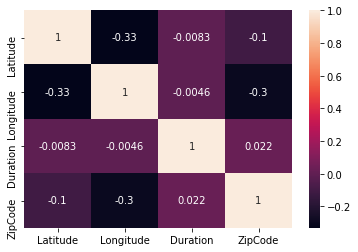

In [25]:
sns.heatmap(df[['Latitude','Longitude','Duration','ZipCode']].corr(),annot=True)
plt.show()

# Visualization

Plot for DURATION: total counts = 215


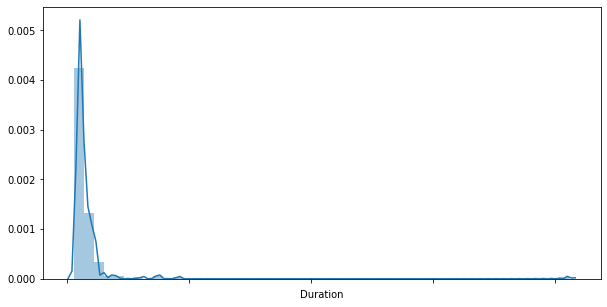

Plot for LONGITUDE: total counts = 215


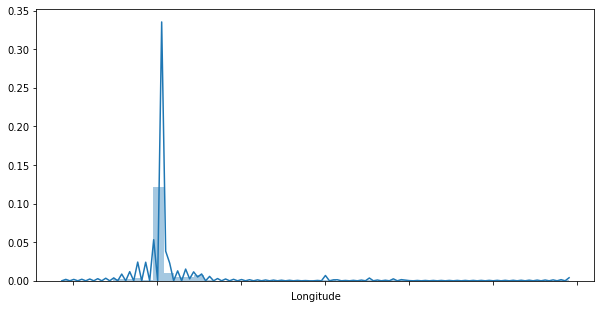

Plot for ZIPCODE: total counts = 215


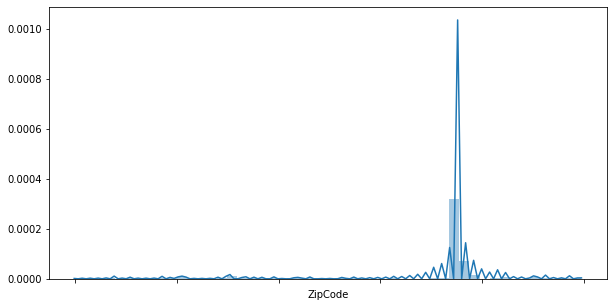

Plot for LATITUDE: total counts = 215


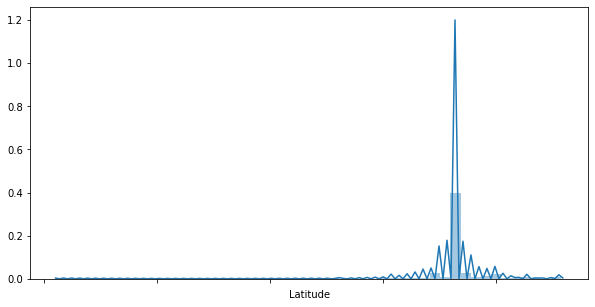

In [26]:
df_explore = df[['Duration','Longitude','ZipCode', 'Latitude']]
for cat in df_explore:
    cat_num = df_explore[cat]
    print("Plot for %s: total counts = %d" % (cat.upper(), len(cat_num)))
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.distplot(cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()

All need to transform

Text(0.5, 0, 'Porosity and hairtype, fontsize = 14')

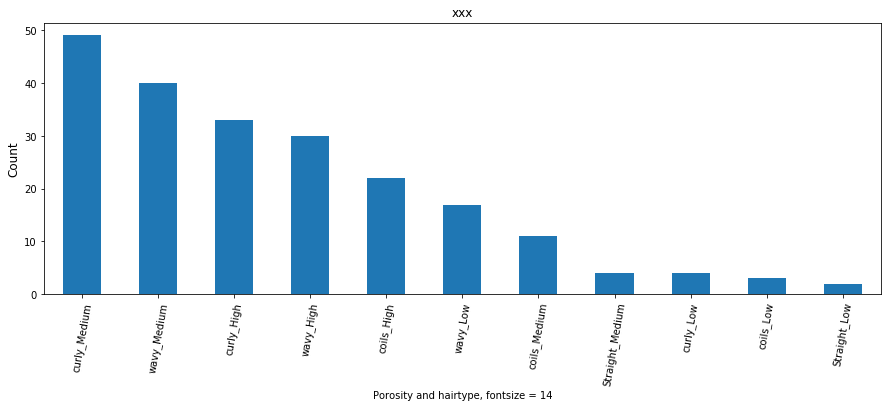

In [27]:
#plt.figure(figsize=(6,4))
age = df.target.value_counts()
age.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Porosity and hairtype, fontsize = 14')


Text(0.5, 0, 'Age Range, fontsize = 12')

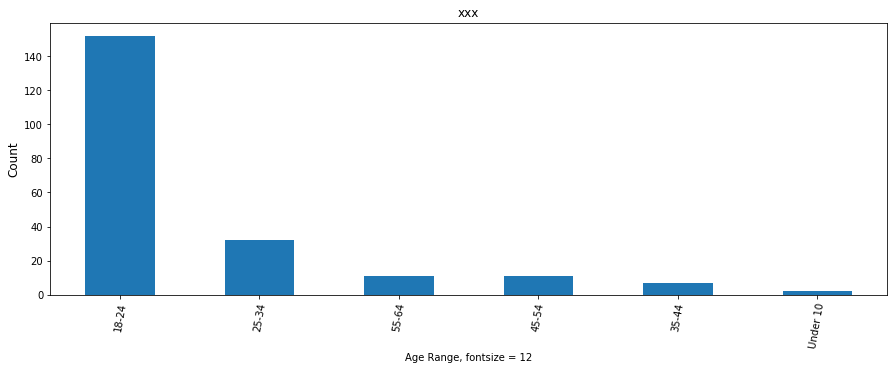

In [28]:
#plt.figure(figsize=(6,4))
age = df.AgeRange.value_counts()
age.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Age Range, fontsize = 12')


Text(0.5, 0, 'Sex')

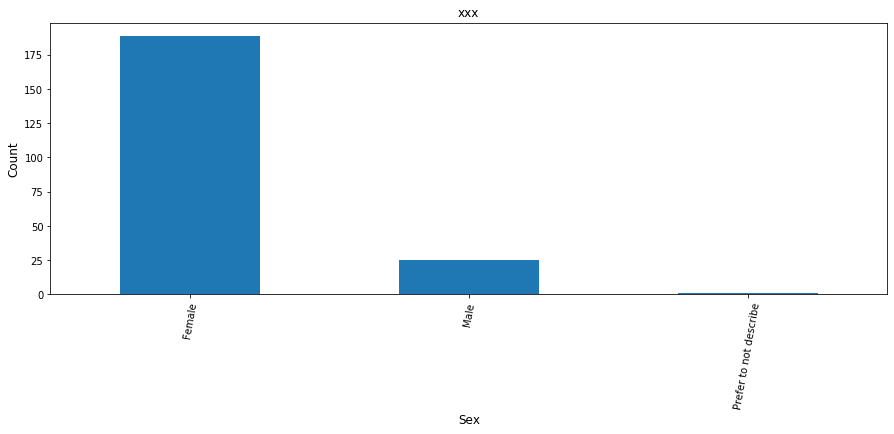

In [29]:
#plt.figure(figsize=(6,4))
sex = df.Sex.value_counts()
sex.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Sex', fontsize = 12)


Text(0.5, 0, 'Hair Length group')

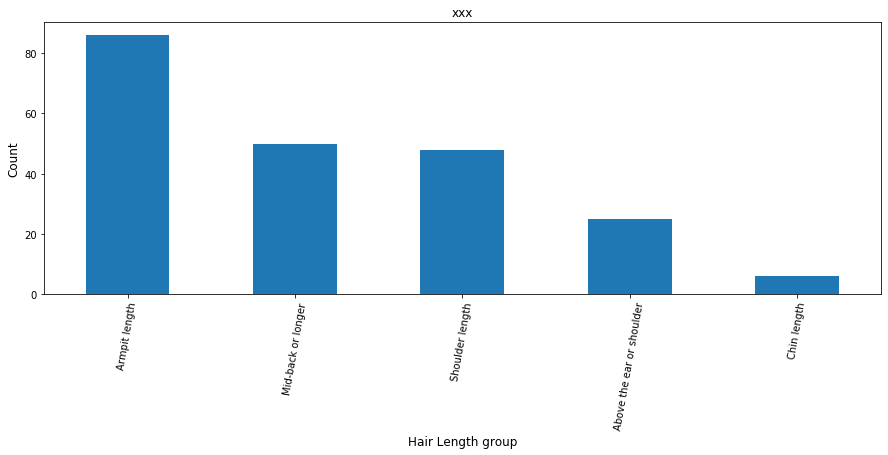

In [30]:
#plt.figure(figsize=(6,4))
Howlonghair = df.HairLength.value_counts()
Howlonghair.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Hair Length group', fontsize = 12)

Text(0.5, 0, 'Hair type group')

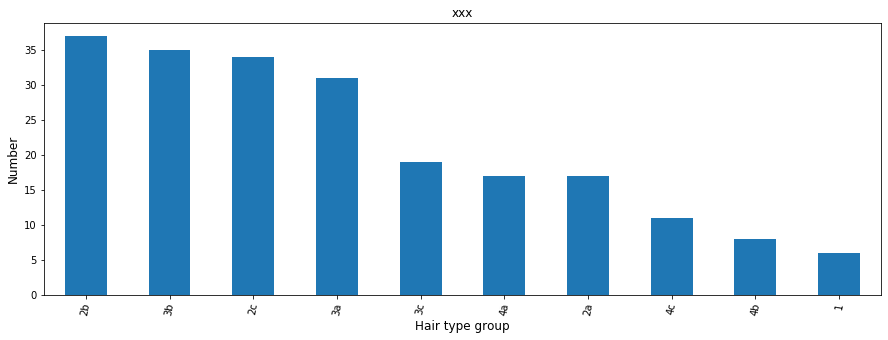

In [31]:
hairtype = df.HairType.value_counts()
hairtype.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Number', fontsize = 12)
plt.xlabel('Hair type group', fontsize = 12)

In [32]:
# Channel = df.Channel.value_counts()
# Channel.plot.bar(figsize = (15, 5), rot = 80)
# plt.title('xxx', fontsize = 12)
# plt.ylabel('Count', fontsize = 12)
# plt.xlabel('Distribution Channel group', fontsize = 12)

Text(0.5, 0, 'Beneficieries Hair Length')

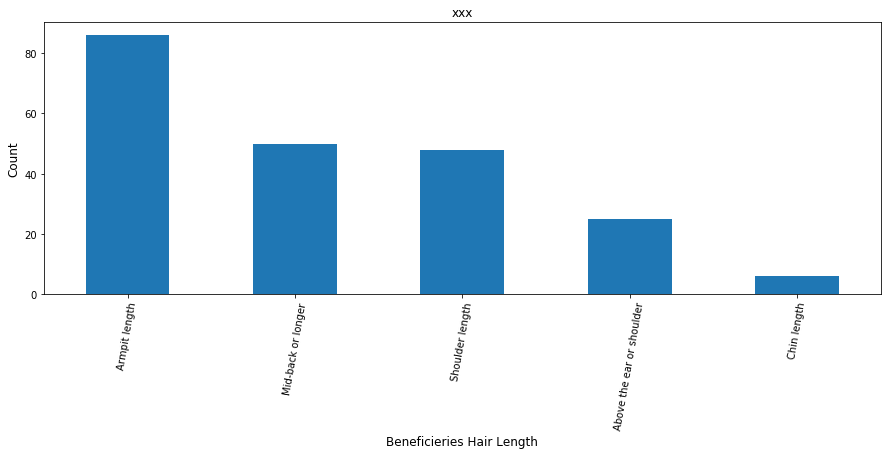

In [33]:
HairLength = df.HairLength.value_counts()
HairLength.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Beneficieries Hair Length', fontsize = 12)

Text(0.5, 0, 'Hair Drying time')

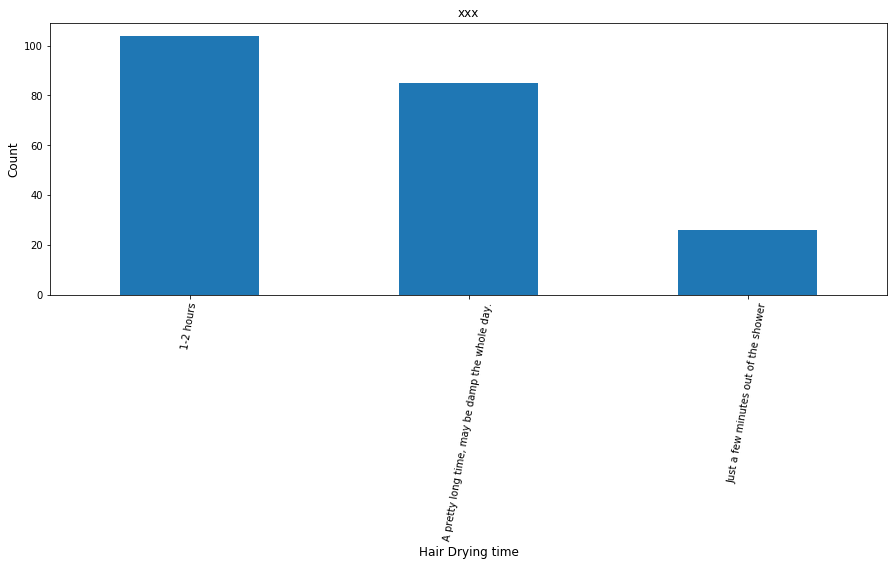

In [34]:
DryingTime = df.DryingTime.value_counts()
DryingTime.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Hair Drying time', fontsize = 12)

Text(0.5, 0, 'The white or yellow flakes frequency')

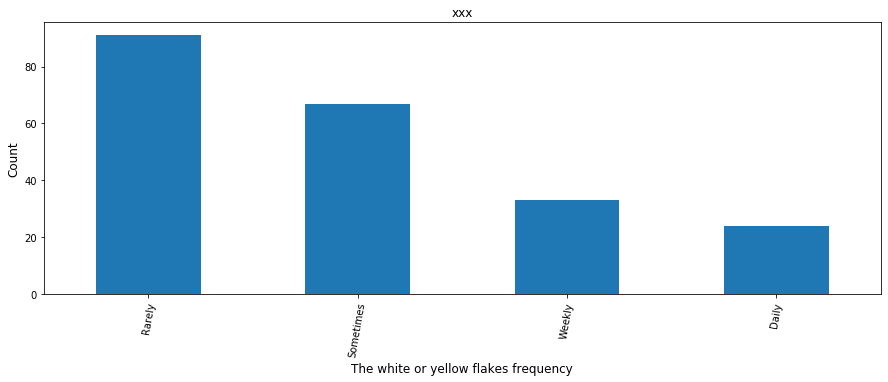

In [35]:
FlakesFrequency = df.FlakesFrequency.value_counts()
FlakesFrequency.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('The white or yellow flakes frequency', fontsize = 12)

Text(0.5, 0, 'Hair type')

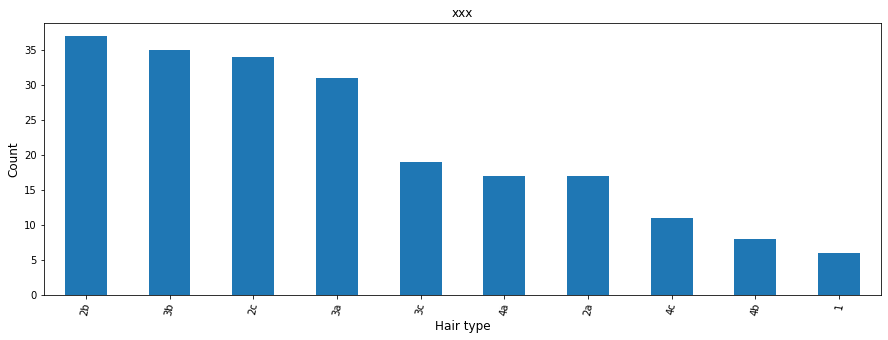

In [36]:
HairType = df.HairType.value_counts()
HairType.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Hair type', fontsize = 12)

Text(0.5, 0, 'Scalp feel Wash group')

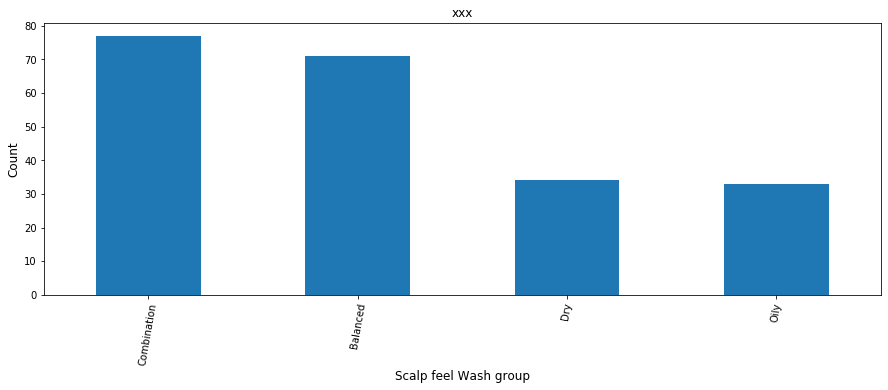

In [37]:
ScalpfeelWash = df.ScalpfeelWash.value_counts()
ScalpfeelWash.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Scalp feel Wash group', fontsize = 12)

Text(0.5, 0, 'Strand group')

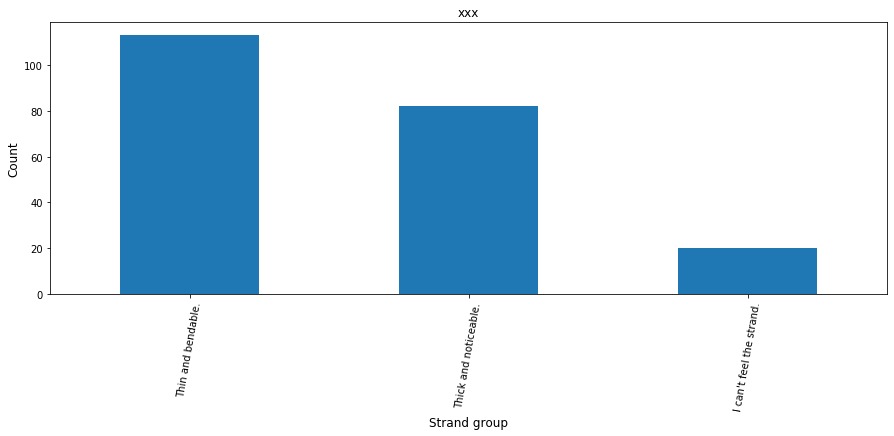

In [38]:
Strand = df.Strand.value_counts()
Strand.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Strand group', fontsize = 12)

Text(0.5, 0, 'Hair Treatment')

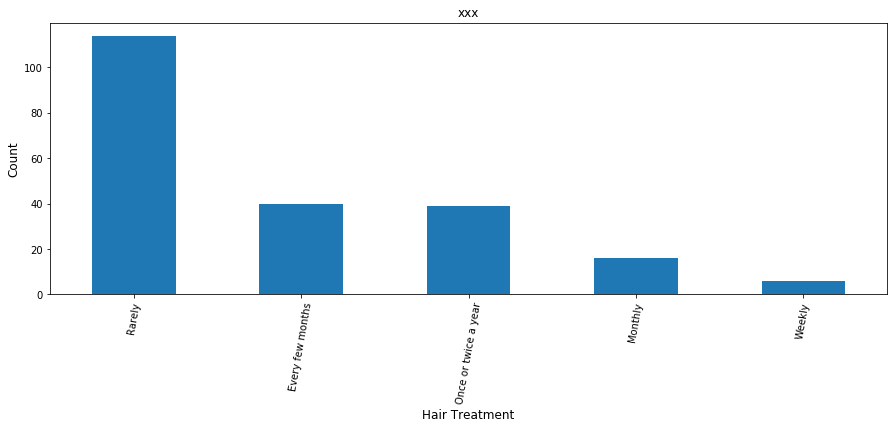

In [39]:
HairTreatment = df.HairTreatment.value_counts()
HairTreatment.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Hair Treatment', fontsize = 12)

Text(0.5, 0, 'Product Smell group')

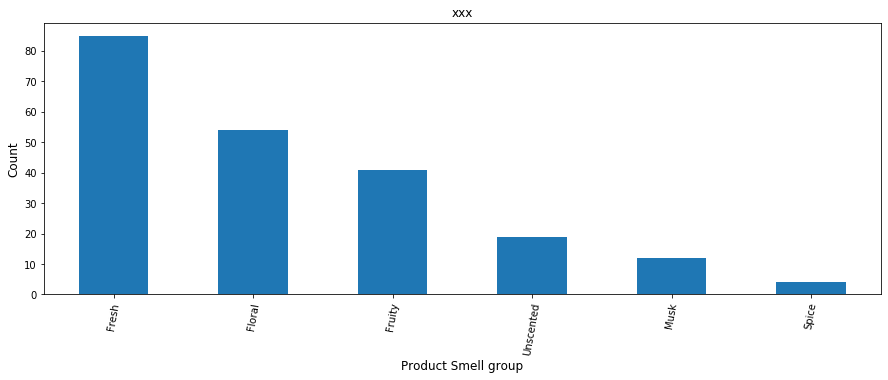

In [40]:
ProductSmell = df.ProductSmell.value_counts()
ProductSmell.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Product Smell group', fontsize = 12)

In [41]:
# df.info()

# Type Conversion

In [42]:
# df['target'] = df['target'].map({'curly_High': 0,
#                                 'curly_Medium' : 1,
#                                 'curly_Low': 2,
#                                 'wavy_High': 3,
#                                 'wavy_Medium' : 4,
#                                 'wavy_Low' : 5, 
#                                 'coils_High': 6, 
#                                 'coils_Medium': 7,
#                                 'coils_Low': 8, 
#                                 'Straight_Medium': 9,
#                                 'Straight_low ': 10,
#                                }).astype(int)



In [43]:
# df['target'] = df['target'].astype(int, errors='ignore')

In [44]:
df['Duration'] = df['Duration'].astype('float64')
df['ZipCode'] = df['ZipCode'].astype('float64')
df['Latitude'] = df['Latitude'].astype('float64')
df['Longitude'] = df['Longitude'].astype('float64')
df['HairLength'] = df['HairLength'].astype('category')
df['DryingTime'] = df['DryingTime'].astype('category')
df['FlakesFrequency'] = df['FlakesFrequency'].astype('category')
df['ScalpfeelWash'] = df['ScalpfeelWash'].astype('category')
df['Strand'] = df['Strand'].astype('category')
df['HairGreyed '] = df['HairGreyed '].astype('category')
df['HairTreatment'] = df['HairTreatment'].astype('category')
df['ProductSmell'] = df['ProductSmell'].astype('category')
df['AgeRange'] = df['AgeRange'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['HairType'] = df['HairType'].astype('category')
df['Porosity'] = df['Porosity'].astype('category')
#df['target'] = df['target'].astype('category')


In [45]:
# df.info()

In [46]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

In [47]:
df['Longitude'] = qt.fit_transform(df[['Longitude']].values.reshape(-1,1))
df['Latitude'] = qt.fit_transform(df[['Latitude']].values.reshape(-1,1))
df['Duration'] = qt.fit_transform(df[['Duration']].values.reshape(-1,1))
df['ZipCode'] = qt.fit_transform(df[['ZipCode']].values.reshape(-1,1))

In [48]:
#from sklearn.preprocessing import StandardScaler
#std_scale =  StandardScaler()

In [49]:
#df['Duration'] = std_scale.fit_transform(df[['Duration']])
#df['Latitude'] = std_scale.fit_transform(df[['Latitude']])
#df['Longitude'] = std_scale.fit_transform(df[['Longitude']])
#df['ZipCode'] = std_scale.fit_transform(df[['ZipCode']])

In [50]:
df.head()

,Duration,Latitude,Longitude,HairLength,DryingTime,FlakesFrequency,HairType,ScalpfeelWash,Strand,HairGreyed,HairTreatment,ProductSmell,AgeRange,Sex,ZipCode,Porosity,target
0,-0.340281,-0.961206,-0.567914,Mid-back or longer,1-2 hours,Sometimes,3a,Combination,Thick and noticeable.,0,Rarely,Fruity,18-24,Female,-0.435015,Medium,curly_Medium
1,-0.409404,0.099727,-0.415781,Shoulder length,Just a few minutes out of the shower,Rarely,2b,Combination,Thin and bendable.,0,Once or twice a year,Floral,18-24,Female,-0.334082,Low,wavy_Low
2,1.348275,0.188522,-0.652593,Mid-back or longer,1-2 hours,Weekly,3b,Combination,Thick and noticeable.,0,Every few months,Floral,18-24,Female,-0.334082,Medium,curly_Medium
3,-0.082085,-1.265736,-1.348275,Armpit length,1-2 hours,Sometimes,3c,Combination,Thin and bendable.,0,Monthly,Fruity,18-24,Female,1.100698,Medium,curly_Medium
4,-1.362953,0.284926,-0.773456,Mid-back or longer,1-2 hours,Daily,3c,Combination,Thick and noticeable.,0,Rarely,Fruity,18-24,Female,-0.915721,Medium,curly_Medium


###  One Hot Encoding with Pandas

In [51]:
df_dummies = pd.get_dummies(df[['HairLength', 'DryingTime', 'FlakesFrequency', 'HairTreatment',
                                'HairType', 'ScalpfeelWash', 'Strand', 'ProductSmell', 'AgeRange', 'Sex', 'Porosity',]])

In [52]:
df = pd.concat([df[['Duration', 'Latitude', 'Longitude', 'ZipCode', 'target']], df_dummies], axis=1)

In [53]:
df.head()

,Duration,Latitude,Longitude,ZipCode,target,HairLength_Above the ear or shoulder,HairLength_Armpit length,HairLength_Chin length,HairLength_Mid-back or longer,HairLength_Shoulder length,...,AgeRange_35-44,AgeRange_45-54,AgeRange_55-64,AgeRange_Under 10,Sex_Female,Sex_Male,Sex_Prefer to not describe,Porosity_High,Porosity_Low,Porosity_Medium
0,-0.340281,-0.961206,-0.567914,-0.435015,curly_Medium,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,-0.409404,0.099727,-0.415781,-0.334082,wavy_Low,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,1.348275,0.188522,-0.652593,-0.334082,curly_Medium,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,-0.082085,-1.265736,-1.348275,1.100698,curly_Medium,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-1.362953,0.284926,-0.773456,-0.915721,curly_Medium,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


#### After transform

Plot for LONGITUDE: total counts = 215


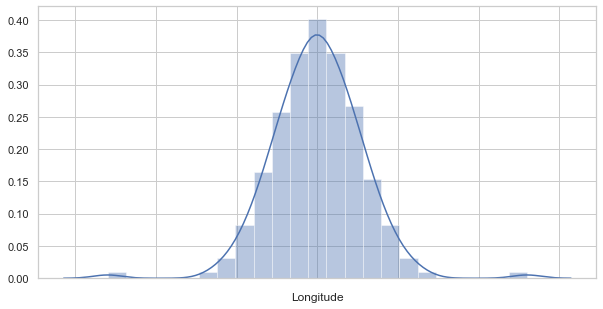

Plot for LATITUDE: total counts = 215


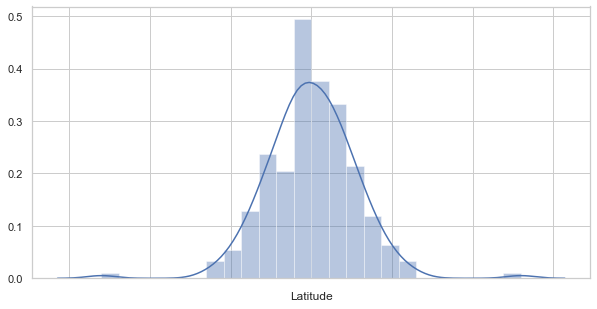

Plot for DURATION: total counts = 215


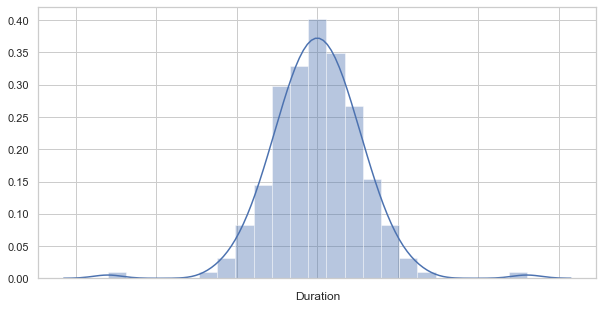

Plot for ZIPCODE: total counts = 215


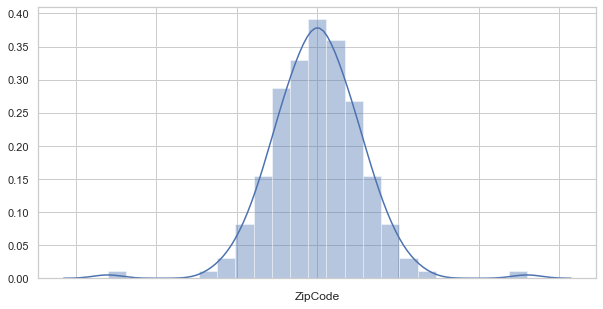

In [54]:
#import seaborn as sns
#import matplotlib.pyplot as plt
sns.set(style="whitegrid")

df_explore = df[['Longitude', 'Latitude', 'Duration', 'ZipCode']]
for cat in df_explore:
    cat_num = df_explore[cat]
    print("Plot for %s: total counts = %d" % (cat.upper(), len(cat_num)))
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.distplot(cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()

In [55]:
data = df

# Building Machine Learning

# Classification

In [56]:
df['target'].unique()

array(['curly_Medium', 'wavy_Low', 'wavy_Medium', 'curly_High',
       'curly_Low', 'wavy_High', 'coils_High', 'Straight_Low',
       'coils_Medium', 'Straight_Medium', 'coils_Low'], dtype=object)

In [57]:
X = df.drop("target", axis=1)
y = df["target"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 42, stratify=y) # 70% training and 30% test

In [59]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(150, 56)
(65, 56)
(150,)
(150,)


#### 1. KNN

#### Use knn.score() to see the accuracy

In [61]:
knn_clf = KNeighborsClassifier(n_neighbors = 7 , metric='minkowski' , p=2)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [62]:
y_pred = knn_clf.predict(X_test)

In [63]:
acc_clf = knn_clf.score(X_train,y_train)
print(round(acc_clf*100, 2), "%")

68.0 %


In [64]:
# try K=1 through K=30 and record testing accuracy
k_range = range(1, 31)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)

[0.47692307692307695, 0.4, 0.46153846153846156, 0.5076923076923077, 0.49230769230769234, 0.5230769230769231, 0.5230769230769231, 0.5846153846153846, 0.5384615384615384, 0.5230769230769231, 0.5230769230769231, 0.5076923076923077, 0.5230769230769231, 0.49230769230769234, 0.5076923076923077, 0.5076923076923077, 0.5230769230769231, 0.5538461538461539, 0.5230769230769231, 0.5076923076923077, 0.5538461538461539, 0.5076923076923077, 0.5384615384615384, 0.5538461538461539, 0.5076923076923077, 0.5076923076923077, 0.46153846153846156, 0.49230769230769234, 0.49230769230769234, 0.5076923076923077]


Text(0, 0.5, 'Testing Accuracy')

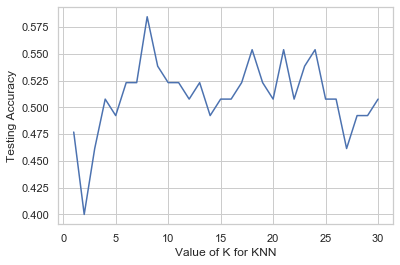

In [65]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### Cross -Validation for Classification

In [66]:
# import k-folder
from sklearn.model_selection import cross_val_score

# use the same model as before
knn_clf = KNeighborsClassifier(n_neighbors = 3)

In [67]:
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn_clf, X, y, cv=5, scoring='accuracy')

In [68]:
# print all 5 times scores 
print(scores)

[0.51162791 0.58139535 0.48837209 0.58139535 0.44186047]


In [69]:
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())

0.5209302325581395


# we could choose differenct neighbors to see which K is the best K.

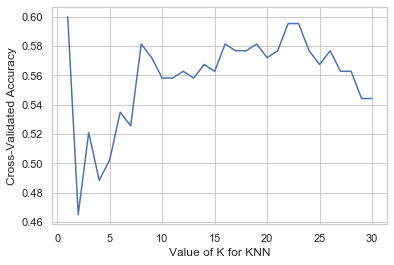

In [70]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [71]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  1  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  2  0  0  1]
 [ 0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 11  0  0  4]
 [ 0  0  0  0  0  5  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  1  0  3  1]
 [ 0  0  0  0  0  0  0  8  0  0  4]]
Classification Report:
                 precision    recall  f1-score   support

   Straight_Low       0.00      0.00      0.00         1
Straight_Medium       0.00      0.00      0.00         1
     coils_High       1.00      0.14      0.25         7
      coils_Low       0.00      0.00      0.00         1
   coils_Medium       0.00      0.00      0.00         3
     curly_High       0.48      1.00      0.65        10
      curly_Low       0.00      0.00      0.00         1
   curly_Medium       0.48      0.73      0.58        15
      wavy_High       1.00      0.44      0.62  

### 2. Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier


In [73]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

Y_prediction = rf.predict(X_test)

# rf.score(X_train, y_train)
acc_random_forest = round(rf.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,4,), "%")

100.0 %


### Feature Importance

In [74]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_, 3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [75]:
importances.head(15)

,importance
feature,
DryingTime_1-2 hours,0.066
Porosity_High,0.062
HairType_2c,0.055
Duration,0.053
"DryingTime_A pretty long time, may be damp the whole day.",0.053
HairType_4a,0.048
Porosity_Medium,0.048
Longitude,0.048
HairType_2b,0.045


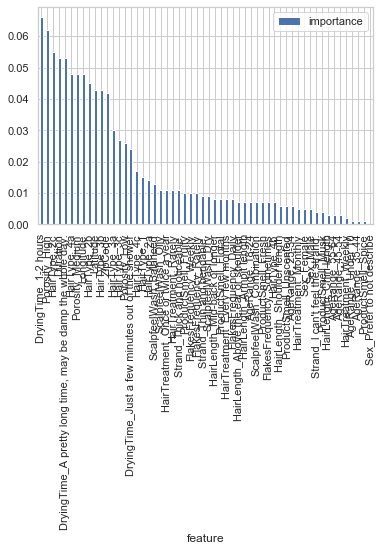

In [76]:
importances.plot.bar()

### 3. XGBoost Classifier

In [77]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

In [78]:
#DataFlair - Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
X = scaler.fit_transform(X)
y = y

In [79]:
#DataFlair - Train the model
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
# DataFlair - Calculate the accuracy
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

83.07692307692308


# Clustering

Clustering techniques apply when there is no class to be predicted but rather when the instances are to be divided into natural groups.
A cluster is often an area of density in the feature space where examples from the domain (observations or rows of data) are closer to the cluster than other clusters. The cluster may have a center (the centroid) that is a sample or a point feature space and may have a boundary or extent.

In [84]:
data.head()


,Duration,Latitude,Longitude,ZipCode,target,HairLength_Above the ear or shoulder,HairLength_Armpit length,HairLength_Chin length,HairLength_Mid-back or longer,HairLength_Shoulder length,...,AgeRange_35-44,AgeRange_45-54,AgeRange_55-64,AgeRange_Under 10,Sex_Female,Sex_Male,Sex_Prefer to not describe,Porosity_High,Porosity_Low,Porosity_Medium
0,-0.340281,-0.961206,-0.567914,-0.435015,curly_Medium,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,-0.409404,0.099727,-0.415781,-0.334082,wavy_Low,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,1.348275,0.188522,-0.652593,-0.334082,curly_Medium,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,-0.082085,-1.265736,-1.348275,1.100698,curly_Medium,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-1.362953,0.284926,-0.773456,-0.915721,curly_Medium,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [85]:
df = data

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
encoder = LabelEncoder()
encoded_HairLength = encoder.fit_transform(df.iloc[:, 3])
encoded_DryingTime = encoder.fit_transform(df.iloc[:, 4])
encoded_FlakesFrequency = encoder.fit_transform(df.iloc[:, 5])
encoded_HairType = encoder.fit_transform(df.iloc[:, 6])
encoded_ScalpfeelWash = encoder.fit_transform(df.iloc[:, 7])
encoded_Strand = encoder.fit_transform(df.iloc[:, 8])
encoded_HairTreatment = encoder.fit_transform(df.iloc[:, 10])
encoded_ProductSmell = encoder.fit_transform(df.iloc[:, 11])
encoded_AgeRange = encoder.fit_transform(df.iloc[:, 12])
encoded_Sex = encoder.fit_transform(df.iloc[:, 13])
encoded_Porosity = encoder.fit_transform(df.iloc[:, 14])

In [88]:
df = df.drop(['target'], axis=1)

In [89]:
df.head()

,Duration,Latitude,Longitude,ZipCode,HairLength_Above the ear or shoulder,HairLength_Armpit length,HairLength_Chin length,HairLength_Mid-back or longer,HairLength_Shoulder length,DryingTime_1-2 hours,...,AgeRange_35-44,AgeRange_45-54,AgeRange_55-64,AgeRange_Under 10,Sex_Female,Sex_Male,Sex_Prefer to not describe,Porosity_High,Porosity_Low,Porosity_Medium
0,-0.340281,-0.961206,-0.567914,-0.435015,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.409404,0.099727,-0.415781,-0.334082,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,1.348275,0.188522,-0.652593,-0.334082,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,-0.082085,-1.265736,-1.348275,1.100698,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,-1.362953,0.284926,-0.773456,-0.915721,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


In [90]:
print(df)

     Duration  Latitude  Longitude   ZipCode  \
0   -0.340281 -0.961206  -0.567914 -0.435015   
1   -0.409404  0.099727  -0.415781 -0.334082   
2    1.348275  0.188522  -0.652593 -0.334082   
3   -0.082085 -1.265736  -1.348275  1.100698   
4   -1.362953  0.284926  -0.773456 -0.915721   
..        ...       ...        ...       ...   
210  0.447927  0.082085  -1.191022  0.979966   
211  0.070337 -0.765582  -0.266675  1.167544   
212  0.789352 -0.645364   0.176612  0.428586   
213  0.358958 -0.064467  -0.979966  0.915721   
214  0.889319  1.058737   1.377932 -1.677432   

     HairLength_Above the ear or shoulder  HairLength_Armpit length  \
0                                       0                         0   
1                                       0                         0   
2                                       0                         0   
3                                       0                         1   
4                                       0                         0 

In [91]:
from sklearn.decomposition import PCA

In [92]:
curly_pca = PCA(n_components=30)
curly_pca.fit(df)
test = curly_pca.transform(df)

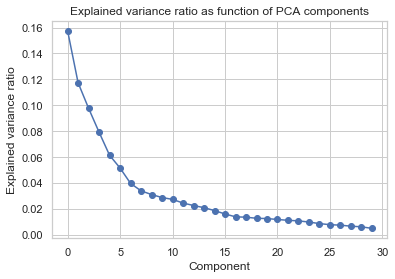

In [93]:
plt.plot(list(curly_pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [94]:
reduction_pca = PCA(n_components=20)
reduced_features = reduction_pca.fit_transform(df)

# Clustering

In [95]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [96]:
km = KMeans(n_clusters = 2)
clusters = km.fit(reduced_features)

In [97]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

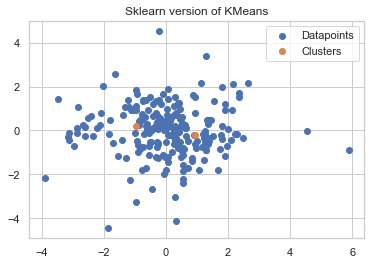

In [98]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [99]:
reduced_features.shape

(215, 20)

In [100]:
clusters.cluster_centers_

array([[ 0.94821604, -0.18832439, -0.20034576,  0.22822573,  0.00293806,
        -0.03485527,  0.00456023, -0.04314031,  0.02331703, -0.01532015,
        -0.01002198,  0.01763929,  0.02383525, -0.02514948,  0.00446432,
         0.01319562, -0.04773564, -0.01389235, -0.01359968, -0.02116674],
       [-0.95707788,  0.19008443,  0.20221815, -0.23035868, -0.00296552,
         0.03518102, -0.00460285,  0.04354349, -0.02353494,  0.01546333,
         0.01011565, -0.01780414, -0.02405801,  0.02538452, -0.00450605,
        -0.01331894,  0.04818177,  0.01402219,  0.01372678,  0.02136456]])